In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

from selenium import webdriver
from bs4 import BeautifulSoup

import time

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import requests
from bs4 import BeautifulSoup as bs
from urllib.request import urlopen
import logging

In [3]:
URL = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off'
page = requests.get(URL)
page.status_code


200

In [4]:
page.text

'<!doctype html><html lang="en"><head><link href="https://rukminim1.flixcart.com" rel="preconnect"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css"/><link rel="stylesheet" href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css"/><meta http-equiv="Content-type" content="text/html; charset=utf-8"/><meta http-equiv="X-UA-Compatible" content="IE=Edge"/><meta property="fb:page_id" content="102988293558"/><meta property="fb:admins" content="658873552,624500995,100000233612389"/><meta name="robots" content="noodp"/><link rel="shortcut icon" href="https:///www/promos/new/20150528-140547-favicon-retina.ico"/><link type="application/opensearchdescription+xml" rel="search" href="/osdd.xml?v=2"/><meta property="og:type" content="website"/><meta name="og_site_name" property="og:site_name" content="Flipkart.com"/><link rel="apple-touch-icon" sizes="57x57" href="/apple-touch-icon-57x57.p

In [5]:
soup = BeautifulSoup(page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <link href="https://rukminim1.flixcart.com" rel="preconnect"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app_modules.chunk.905c37.css" rel="stylesheet"/>
  <link href="//static-assets-web.flixcart.com/fk-p-linchpin-web/fk-cp-zion/css/app.chunk.914d0a.css" rel="stylesheet"/>
  <meta content="text/html; charset=utf-8" http-equiv="Content-type"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="102988293558" property="fb:page_id"/>
  <meta content="658873552,624500995,100000233612389" property="fb:admins"/>
  <meta content="noodp" name="robots"/>
  <link href="https:///www/promos/new/20150528-140547-favicon-retina.ico" rel="shortcut icon"/>
  <link href="/osdd.xml?v=2" rel="search" type="application/opensearchdescription+xml"/>
  <meta content="website" property="og:type"/>
  <meta content="Flipkart.com" name="og_site_name" property="og:site_name"/>
  <link href="/apple-touch-icon-57x

In [6]:
name = soup.find('div',class_='_4rR01T')
name

<div class="_4rR01T">POCO C51 (Royal Blue, 64 GB)</div>

In [7]:
name.text

'POCO C51 (Royal Blue, 64 GB)'

In [8]:
rating = soup.find('div',class_='_3LWZlK')
rating

<div class="_3LWZlK">4.3</div>

In [9]:
rating.text

'4.3'

In [10]:
specifications = soup.find('div',class_= 'fMghEO')
specifications.text

'4 GB RAM | 64 GB ROM | Expandable Upto 1 TB16.56 cm (6.52 inch) HD+ Display8MP Dual Rear Camera | 5MP Front Camera5000 mAh BatteryHelio G36 Processor1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'

In [11]:
spec = specifications.find_all('li',class_ = 'rgWa7D')
print(spec[0].text)
print(spec[1].text)
print(spec[2].text)
print(spec[3].text)
print(spec[4].text)
print(spec[5].text)


4 GB RAM | 64 GB ROM | Expandable Upto 1 TB
16.56 cm (6.52 inch) HD+ Display
8MP Dual Rear Camera | 5MP Front Camera
5000 mAh Battery
Helio G36 Processor
1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories


In [12]:
price = soup.find('div',class_= '_30jeq3 _1_WHN1')
price.text

'₹6,999'

In [13]:
rating_reviews = soup.find('span',attrs = {'class':'_2_R_DZ'})
rating_reviews.text

'12,486 Ratings\xa0&\xa0427 Reviews'

In [14]:
product_details = soup.findAll('div',attrs = {'class':'_3pLy-c row'})


In [15]:
product_details

[<div class="_3pLy-c row"><div class="col col-7-12"><div class="_4rR01T">POCO C51 (Royal Blue, 64 GB)</div><div class="gUuXy-"><span class="_1lRcqv" id="productRating_LSTMOBGZCQFCWNDK89PTMGT86_MOBGZCQFCWNDK89P_"><div class="_3LWZlK">4.3</div></span><span class="_2_R_DZ"><span><span>12,486 Ratings </span><span class="_13vcmD">&amp;</span><span> 427 Reviews</span></span></span></div><div class="fMghEO"><ul class="_1xgFaf"><li class="rgWa7D">4 GB RAM | 64 GB ROM | Expandable Upto 1 TB</li><li class="rgWa7D">16.56 cm (6.52 inch) HD+ Display</li><li class="rgWa7D">8MP Dual Rear Camera | 5MP Front Camera</li><li class="rgWa7D">5000 mAh Battery</li><li class="rgWa7D">Helio G36 Processor</li><li class="rgWa7D">1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories</li></ul></div></div><div class="col col-5-12 nlI3QM"><div class="_3tbKJL"><div class="_25b18c"><div class="_30jeq3 _1_WHN1">₹6,999</div><div class="_3I9_wc _27UcVY">₹<!-- -->9,999</div><div class="_3

In [16]:
len(product_details)

24

In [17]:
for product in product_details:
    
    name = product.find('div',class_='_4rR01T')
    print(name.text)     
                        
    rating = product.find('div',class_='_3LWZlK')
    print(rating.text)   
                        
    rating_reviews = product.find('span',attrs = {'class':'_2_R_DZ'})
    print(rating_reviews.text)    
                        
    price = product.find('div',class_= '_30jeq3 _1_WHN1')
    print(price.text)
    
    f = []
    m = product.find('ul',class_='_1xgFaf')
    for li in m:
        f.append(li.text)
        print(f)
        
        print('_'*100)
        print()

POCO C51 (Royal Blue, 64 GB)
4.3
12,486 Ratings & 427 Reviews
₹6,999
['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB']
____________________________________________________________________________________________________

['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '16.56 cm (6.52 inch) HD+ Display']
____________________________________________________________________________________________________

['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '16.56 cm (6.52 inch) HD+ Display', '8MP Dual Rear Camera | 5MP Front Camera']
____________________________________________________________________________________________________

['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '16.56 cm (6.52 inch) HD+ Display', '8MP Dual Rear Camera | 5MP Front Camera', '5000 mAh Battery']
____________________________________________________________________________________________________

['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB', '16.56 cm (6.52 inch) HD+ Display', '8MP Dual Rear Camera | 5MP Front

In [18]:
title = []
rating = []
RnR = []
price = []
features = []
pgno = []

for x in range(1,4):
    start_time = time.time()
    
    URL = "https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"
    page = requests.get(URL)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    product_details = soup.findAll('div',attrs = {'class':'_3pLy-c row'})
    
    for product in product_details:
  #title
        i = product.find('div',attrs = {'class':'_4rR01T'})
        if i is None:
            title.append(np.NaN)
        else:
            title.append(i.text)
            
   #rating         
j = product.find('div',attrs = {'class':'_3LWZlK'})
if j is None:
    rating.append(np.NaN)
            
else:
    rating.append(j.text)
            
            
            
 #rating and review      
k = product.find('span',attrs = {'class':'_2_R_DZ'})
if k is None:
    RnR.append(np.NaN)
else:
    RnR.append(k.text) 
            

            # price
l = product.find('div',attrs = {'class' : '_30jeq3 _1_WHN1'})
if l is None:
    price.append(np.NaN)
else:
    price.append(l.text)   
             
    
    # features
f = []
m = product.find('ul',attrs = {'class':'_1xgFaf'})
if l is m:
    f.append(li.text)
    features.append(f)
    pgno.append(x)
            
        
        
        
        
end_time =time.time()
print('Page{} completed in {} seconds'.format(x, end_time - start_time))
    
        

Page3 completed in 0.46207523345947266 seconds


In [20]:
title = []
rating = []
RnR = []
price = []
features = []
pgno = []

for x in range(1,4):
    start_time = time.time()
    
    url = 'https://www.flipkart.com/search?q=phone&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page={}'.format(x)
    page = requests.get(url)
    pagecontent = page.text
    soup = BeautifulSoup(pagecontent)
    
    product_details = soup.findAll('div', attrs = {'class' :'_3pLy-c row'})
    
    for product in product_details:
        # title
        i = product.find('div', attrs = {'class':'_4rR01T'})
        if i is None:
            title.append(np.NaN)
        else:
            title.append(i.text)

        # rating
        j = product.find('div', attrs = {'class':'_3LWZlK'})
        if j is None:
            rating.append(np.NaN)
        else:
            rating.append(j.text)

        # num of ratings & reviews
        k = product.find('span', attrs = {'class':'_2_R_DZ'})
        if k is None:
            RnR.append(np.NaN)
        else:
            RnR.append(k.text)

        # price
        l = product.find('div', attrs = {'class':'_30jeq3 _1_WHN1'})
        if l is None:
            price.append(np.NaN)
        else:
            price.append(l.text)

        # Features
        f = []
        m = product.find('ul', attrs = {'class':'_1xgFaf'})
        for li in m:
            f.append(li.text)
        features.append(f)
        
        pgno.append(x)
        
    end_time = time.time()
    print('Page {} completed in {} seconds'.format(x, end_time - start_time))

Page 1 completed in 0.7240650653839111 seconds
Page 2 completed in 0.483675479888916 seconds
Page 3 completed in 0.5287878513336182 seconds


In [21]:
print(len(title))
print(len(rating))
print(len(RnR))
print(len(price))
print(len(features))
print(len(pgno))

72
72
72
72
72
72


In [22]:
title[0:10]

['POCO C51 (Royal Blue, 64 GB)',
 'POCO C51 (Power Black, 64 GB)',
 'SAMSUNG Galaxy F04 (Opal Green, 64 GB)',
 'Cellecor E3',
 'SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)',
 'SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)',
 'MOTOROLA e32 (Arctic Blue, 64 GB)',
 'GREENBERRI G370',
 'MOTOROLA e13 (Cosmic Black, 64 GB)',
 'MOTOROLA g13 (Matte Charcoal, 128 GB)']

In [23]:
features[:10]

[['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.56 cm (6.52 inch) HD+ Display',
  '8MP Dual Rear Camera | 5MP Front Camera',
  '5000 mAh Battery',
  'Helio G36 Processor',
  '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.56 cm (6.52 inch) HD+ Display',
  '8MP Dual Rear Camera | 5MP Front Camera',
  '5000 mAh Battery',
  'Helio G36 Processor',
  '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.51 cm (6.5 inch) HD Display',
  '13MP + 2MP | 5MP Front Camera',
  '5000 mAh Lithium-Ion Battery',
  'Mediatek Helio P35 Processor',
  '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories'],
 ['32 MB RAM | 32 MB ROM | Expandable Upto 32 GB',
  '4.57 cm (1.8 inch) Display',
  '0.8MP Rear Camera',
  '1000 mAh Battery',
  '1 Year Manufacturer Warranty'],

In [25]:
df = pd.DataFrame({'Product_Name':title,'Price':price,'Rating':rating,'RnR':RnR, 'Features':features, 'Page':pgno})

In [27]:
df

,Product_Name,Price,Rating,RnR,Features,Page
0,"POCO C51 (Royal Blue, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ...",1
1,"POCO C51 (Power Black, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ...",1
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹8,499",4.2,"22,724 Ratings & 1,167 Reviews","[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ...",1
3,Cellecor E3,"₹1,061",3.5,76 Ratings & 4 Reviews,[32 MB RAM | 32 MB ROM | Expandable Upto 32 GB...,1
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4.3,"1,49,128 Ratings & 8,528 Reviews","[4 GB RAM | 64 GB ROM | Expandable Upto 1 TB, ...",1
...,...,...,...,...,...,...
67,"POCO C55 (Cool Blue, 128 GB)","₹10,999",4.1,"12,344 Ratings & 675 Reviews","[6 GB RAM | 128 GB ROM | Expandable Upto 1 TB,...",3
68,"POCO M4 5G (Power Black, 128 GB)","₹13,999",4.2,"39,526 Ratings & 2,873 Reviews",[6 GB RAM | 128 GB ROM | Expandable Upto 512 G...,3
69,"REDMI 9 Activ (Coral Green, 128 GB)","₹9,499",4.2,"5,777 Ratings & 368 Reviews",[6 GB RAM | 128 GB ROM | Expandable Upto 512 G...,3
70,"POCO C50 (Country Green, 32 GB)","₹6,499",4.2,"31,377 Ratings & 1,399 Reviews",[2 GB RAM | 32 GB ROM | Expandable Upto 512 GB...,3


In [28]:
df.isnull().sum()

Product_Name    0
Price           0
Rating          0
RnR             0
Features        0
Page            0
dtype: int64

In [29]:
features[:5]

[['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.56 cm (6.52 inch) HD+ Display',
  '8MP Dual Rear Camera | 5MP Front Camera',
  '5000 mAh Battery',
  'Helio G36 Processor',
  '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.56 cm (6.52 inch) HD+ Display',
  '8MP Dual Rear Camera | 5MP Front Camera',
  '5000 mAh Battery',
  'Helio G36 Processor',
  '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'],
 ['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
  '16.51 cm (6.5 inch) HD Display',
  '13MP + 2MP | 5MP Front Camera',
  '5000 mAh Lithium-Ion Battery',
  'Mediatek Helio P35 Processor',
  '1 Year Manufacturer Warranty for Device and 6 Months Manufacturer Warranty for In-Box Accessories'],
 ['32 MB RAM | 32 MB ROM | Expandable Upto 32 GB',
  '4.57 cm (1.8 inch) Display',
  '0.8MP Rear Camera',
  '1000 mAh Battery',
  '1 Year Manufacturer Warranty'],

In [30]:
df.Features[0]

['4 GB RAM | 64 GB ROM | Expandable Upto 1 TB',
 '16.56 cm (6.52 inch) HD+ Display',
 '8MP Dual Rear Camera | 5MP Front Camera',
 '5000 mAh Battery',
 'Helio G36 Processor',
 '1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories']

In [31]:
df.Features.apply(lambda x :x[0]).value_counts()

4 GB RAM | 64 GB ROM | Expandable Upto 1 TB       18
6 GB RAM | 128 GB ROM                              7
32 MB RAM | 32 MB ROM | Expandable Upto 32 GB      6
6 GB RAM | 128 GB ROM | Expandable Upto 1 TB       6
4 GB RAM | 128 GB ROM | Expandable Upto 1 TB       4
32 MB RAM | 32 MB ROM                              4
8 GB RAM | 128 GB ROM | Expandable Upto 1 TB       4
8 GB RAM | 128 GB ROM                              4
3 GB RAM | 32 GB ROM | Expandable Upto 512 GB      4
4 GB RAM | 64 GB ROM | Expandable Upto 2 TB        3
4 GB RAM | 128 GB ROM                              3
6 GB RAM | 128 GB ROM | Expandable Upto 512 GB     3
4 GB RAM | 64 GB ROM | Expandable Upto 512 GB      2
2 GB RAM | 32 GB ROM | Expandable Upto 512 GB      2
2 GB RAM | 64 GB ROM | Expandable Upto 1 TB        1
2 GB RAM | 32 GB ROM | Expandable Upto 1 TB        1
Name: Features, dtype: int64

In [32]:
df.Features.apply(lambda x :x[1]).value_counts()

16.71 cm (6.58 inch) Full HD+ Display           10
16.76 cm (6.6 inch) HD+ Display                 10
16.56 cm (6.52 inch) HD+ Display                 8
16.51 cm (6.5 inch) HD+ Display                  7
17.02 cm (6.7 inch) HD+ Display                  6
4.57 cm (1.8 inch) Display                       5
16.76 cm (6.6 inch) Full HD+ Display             5
16.64 cm (6.55 inch) Full HD+ Display            4
16.21 cm (6.38 inch) Full HD+ Display            4
6.1 cm (2.4 inch) Display                        3
16.51 cm (6.5 inch) HD Display                   2
3.66 cm (1.44 inch) Display                      2
16.94 cm (6.67 inch) Full HD+ Display            2
17.04 cm (6.71 inch) HD+ Display                 2
16.33 cm (6.43 inch) Full HD+ AMOLED Display     1
16.59 cm (6.53 inch) HD+ Display                 1
Name: Features, dtype: int64

In [33]:
df.Features.apply(lambda x :x[2]).value_counts()

50MP + 2MP | 8MP Front Camera                                    11
0.8MP Rear Camera                                                 7
50MP + AI Lens | 5MP Front Camera                                 6
50MP + 2MP | 5MP Front Camera                                     6
8MP Rear Camera | 5MP Front Camera                                5
50MP + 8MP + 2MP | 16MP Front Camera                              4
50MP + 5MP + 2MP | 8MP Front Camera                               4
64 MP (OIS) + 2MP | 16MP Front Camera                             4
13MP + AI Lens | 5MP Front Camera                                 3
13MP + 2MP | 5MP Front Camera                                     3
8MP Dual Camera | 5MP Front Camera                                2
50MP Dual Rear Camera | 5MP Front Camera                          2
48MP + 8MP + 2MP | 13MP Front Camera                              2
8MP Dual Rear Camera | 5MP Front Camera                           2
50MP + 2MP Depth Sensor + 2MP Macro Sensor | 8MP

In [34]:
df.Features.apply(lambda x :x[3]).value_counts()

5000 mAh Battery                        27
5000 mAh Lithium Polymer Battery         9
6000 mAh Lithium Polymer Battery         6
1000 mAh Battery                         4
6000 mAh Lithium Ion Battery             4
2750 mAh Battery                         4
4500 mAh Battery                         4
5000 mAh Lithium-ion Polymer Battery     3
6000 mAh Battery                         3
5000 mAh Lithium-Ion Battery             2
800 mAh Battery                          2
5000 mAh Lithium Ion Polymer Battery     2
5000 mAh Lithium Ion Battery             2
Name: Features, dtype: int64

In [35]:
df.Features.apply(lambda x :x[4]).value_counts()

Qualcomm Snapdragon 680 Processor                                  8
G37 Processor                                                      6
Dimensity 6020 Processor                                           6
1 Year Manufacturer Warranty                                       5
Mediatek Helio A22 Processor                                       4
Snapdragon 695 Processor                                           4
Exynos 850 Processor                                               4
Mediatek Helio G37 Processor                                       3
Unisoc Spreadtrum SC9863A1 Processor                               3
Qualcomm Snapdragon 695 5G Processor                               2
Mediatek Helio A22 Processor, Upto 2.0 GHz Processor               2
Mediatek Dimensity 700 Processor                                   2
1 year warranty for device and 6months warranty for accessories    2
Mediatek Helio G85 Processor                                       2
Helio G36 Processor               

In [36]:
df.Price.value_counts()

₹9,499     9
₹13,999    6
₹10,999    5
₹11,999    4
₹7,499     4
₹12,999    3
₹6,599     3
₹1,061     3
₹7,999     3
₹8,399     3
₹15,499    2
₹18,999    2
₹20,999    2
₹15,999    2
₹6,999     2
₹8,499     2
₹1,353     2
₹8,999     2
₹9,999     2
₹1,099     2
₹6,299     1
₹1,105     1
₹1,236     1
₹1,396     1
₹7,299     1
₹6,199     1
₹16,999    1
₹6,499     1
₹5,999     1
Name: Price, dtype: int64

In [37]:
df.Rating.value_counts()

4.2    24
4.3    14
3.9     8
4.5     8
4.1     6
3.5     4
3.7     3
4.4     3
4       1
3.3     1
Name: Rating, dtype: int64

In [38]:
df.Features = df.Features.apply(lambda x :','.join(x))

In [39]:
df.head()

,Product_Name,Price,Rating,RnR,Features,Page
0,"POCO C51 (Royal Blue, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1
1,"POCO C51 (Power Black, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹8,499",4.2,"22,724 Ratings & 1,167 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1
3,Cellecor E3,"₹1,061",3.5,76 Ratings & 4 Reviews,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4.3,"1,49,128 Ratings & 8,528 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1


In [40]:
df.Features[0]

'4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16.56 cm (6.52 inch) HD+ Display,8MP Dual Rear Camera | 5MP Front Camera,5000 mAh Battery,Helio G36 Processor,1 Year Manufacturer Warranty for Phone and 6 Months Warranty for in the Box Accessories'

In [41]:
import re

In [42]:
Processor_regex = re.compile(r'[A-Za-z0-9\s]+Processor')
Processor_regex.findall(df.Features[0])

['Helio G36 Processor']

In [43]:
df['Processor'] = df.Features.apply(lambda x : Processor_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor
0,"POCO C51 (Royal Blue, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor]
1,"POCO C51 (Power Black, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor]
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹8,499",4.2,"22,724 Ratings & 1,167 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor]
3,Cellecor E3,"₹1,061",3.5,76 Ratings & 4 Reviews,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1,[]
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4.3,"1,49,128 Ratings & 8,528 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Exynos 850 Processor]


In [44]:
RAM_regex = re.compile(r'[A-Za-z0-9\s]+RAM')
RAM_regex.findall(df.Features[0])

['4 GB RAM']

In [45]:
df['RAM'] = df.Features.apply(lambda x : RAM_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM
0,"POCO C51 (Royal Blue, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM]
1,"POCO C51 (Power Black, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM]
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹8,499",4.2,"22,724 Ratings & 1,167 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM]
3,Cellecor E3,"₹1,061",3.5,76 Ratings & 4 Reviews,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1,[],[32 MB RAM]
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4.3,"1,49,128 Ratings & 8,528 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Exynos 850 Processor],[4 GB RAM]


In [46]:
Storage_regex = re.compile(r'[A-Za-z0-9\s]+ROM')
Storage_regex.findall(df.Features[0])

[' 64 GB ROM']

In [47]:
df['Storage'] = df.Features.apply(lambda x : Storage_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage
0,"POCO C51 (Royal Blue, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM],[ 64 GB ROM]
1,"POCO C51 (Power Black, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM],[ 64 GB ROM]
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹8,499",4.2,"22,724 Ratings & 1,167 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM],[ 64 GB ROM]
3,Cellecor E3,"₹1,061",3.5,76 Ratings & 4 Reviews,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1,[],[32 MB RAM],[ 32 MB ROM]
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4.3,"1,49,128 Ratings & 8,528 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Exynos 850 Processor],[4 GB RAM],[ 64 GB ROM]


In [48]:
Battery_regex = re.compile(r'[A-Za-z0-9\s]+Battery')
Battery_regex.findall(df.Features[0])

['5000 mAh Battery']

In [49]:
df['Battery'] = df.Features.apply(lambda x : Battery_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage,Battery
0,"POCO C51 (Royal Blue, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery]
1,"POCO C51 (Power Black, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery]
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹8,499",4.2,"22,724 Ratings & 1,167 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM],[ 64 GB ROM],[Ion Battery]
3,Cellecor E3,"₹1,061",3.5,76 Ratings & 4 Reviews,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1,[],[32 MB RAM],[ 32 MB ROM],[1000 mAh Battery]
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4.3,"1,49,128 Ratings & 8,528 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Exynos 850 Processor],[4 GB RAM],[ 64 GB ROM],[6000 mAh Lithium Ion Battery]


In [50]:
Screen_regex = re.compile(r'[0-9a-zA-Z\s.]+(?:cm|inch|inches)')
Screen_regex.findall(df.Features[0])

['16.56 cm', '6.52 inch']

In [51]:
df['Screensize'] = df.Features.apply(lambda x : Screen_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage,Battery,Screensize
0,"POCO C51 (Royal Blue, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery],"[16.56 cm, 6.52 inch]"
1,"POCO C51 (Power Black, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery],"[16.56 cm, 6.52 inch]"
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹8,499",4.2,"22,724 Ratings & 1,167 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM],[ 64 GB ROM],[Ion Battery],"[16.51 cm, 6.5 inch]"
3,Cellecor E3,"₹1,061",3.5,76 Ratings & 4 Reviews,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1,[],[32 MB RAM],[ 32 MB ROM],[1000 mAh Battery],"[4.57 cm, 1.8 inch]"
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4.3,"1,49,128 Ratings & 8,528 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Exynos 850 Processor],[4 GB RAM],[ 64 GB ROM],[6000 mAh Lithium Ion Battery],"[16.76 cm, 6.6 inch]"


In [56]:
Brand_regex = re.compile(r'^\w+')
Brand_regex.findall(df.Product_Name[0])

['POCO']

In [59]:
df['Brand'] = df["Product_Name"].apply(lambda x : Brand_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage,Battery,Screensize,Brand
0,"POCO C51 (Royal Blue, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery],"[16.56 cm, 6.52 inch]",[POCO]
1,"POCO C51 (Power Black, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery],"[16.56 cm, 6.52 inch]",[POCO]
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹8,499",4.2,"22,724 Ratings & 1,167 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM],[ 64 GB ROM],[Ion Battery],"[16.51 cm, 6.5 inch]",[SAMSUNG]
3,Cellecor E3,"₹1,061",3.5,76 Ratings & 4 Reviews,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1,[],[32 MB RAM],[ 32 MB ROM],[1000 mAh Battery],"[4.57 cm, 1.8 inch]",[Cellecor]
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4.3,"1,49,128 Ratings & 8,528 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Exynos 850 Processor],[4 GB RAM],[ 64 GB ROM],[6000 mAh Lithium Ion Battery],"[16.76 cm, 6.6 inch]",[SAMSUNG]


In [60]:
front_camera_regex = re.compile(r'[A-Za-z0-9\s]+Front')
front_camera_regex.findall(df.Features[0])

[' 5MP Front']

In [61]:
df['Front_camera'] = df.Features.apply(lambda x : front_camera_regex.findall(x))
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage,Battery,Screensize,Brand,Front_camera
0,"POCO C51 (Royal Blue, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery],"[16.56 cm, 6.52 inch]",[POCO],[ 5MP Front]
1,"POCO C51 (Power Black, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Helio G36 Processor],[4 GB RAM],[ 64 GB ROM],[5000 mAh Battery],"[16.56 cm, 6.52 inch]",[POCO],[ 5MP Front]
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹8,499",4.2,"22,724 Ratings & 1,167 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Mediatek Helio P35 Processor],[4 GB RAM],[ 64 GB ROM],[Ion Battery],"[16.51 cm, 6.5 inch]",[SAMSUNG],[ 5MP Front]
3,Cellecor E3,"₹1,061",3.5,76 Ratings & 4 Reviews,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1,[],[32 MB RAM],[ 32 MB ROM],[1000 mAh Battery],"[4.57 cm, 1.8 inch]",[Cellecor],[]
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4.3,"1,49,128 Ratings & 8,528 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,[Exynos 850 Processor],[4 GB RAM],[ 64 GB ROM],[6000 mAh Lithium Ion Battery],"[16.76 cm, 6.6 inch]",[SAMSUNG],[ 8MP Front]


In [62]:
df.Processor = df.Processor.apply(lambda x :''.join(x))
df.RAM = df.RAM.apply(lambda x :''.join(x))
df.Storage = df.Storage.apply(lambda x :''.join(x))
df.Brand = df.Brand.apply(lambda x :''.join(x))
df.Battery = df.Battery.apply(lambda x :''.join(x))
df.Front_camera = df.Front_camera.apply(lambda x :''.join(x))

In [69]:
df['Screensize_cm'] = df.Screensize.apply(lambda x : x[0])
df['Screensize_inch'] = df.Screensize.apply(lambda x : x[1])


In [70]:
df.head()

,Product_Name,Price,Rating,RnR,Features,Page,Processor,RAM,Storage,Battery,Screensize,Brand,Front_camera,Screensize_cm,Screensize_inch
0,"POCO C51 (Royal Blue, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,Helio G36 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,"[16.56 cm, 6.52 inch]",POCO,5MP Front,16.56 cm,6.52 inch
1,"POCO C51 (Power Black, 64 GB)","₹6,999",4.3,"12,486 Ratings & 427 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,Helio G36 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,"[16.56 cm, 6.52 inch]",POCO,5MP Front,16.56 cm,6.52 inch
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)","₹8,499",4.2,"22,724 Ratings & 1,167 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,Mediatek Helio P35 Processor,4 GB RAM,64 GB ROM,Ion Battery,"[16.51 cm, 6.5 inch]",SAMSUNG,5MP Front,16.51 cm,6.5 inch
3,Cellecor E3,"₹1,061",3.5,76 Ratings & 4 Reviews,"32 MB RAM | 32 MB ROM | Expandable Upto 32 GB,...",1,,32 MB RAM,32 MB ROM,1000 mAh Battery,"[4.57 cm, 1.8 inch]",Cellecor,,4.57 cm,1.8 inch
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)","₹10,999",4.3,"1,49,128 Ratings & 8,528 Reviews","4 GB RAM | 64 GB ROM | Expandable Upto 1 TB,16...",1,Exynos 850 Processor,4 GB RAM,64 GB ROM,6000 mAh Lithium Ion Battery,"[16.76 cm, 6.6 inch]",SAMSUNG,8MP Front,16.76 cm,6.6 inch


In [72]:
data = df[['Product_Name', 'Brand','Rating','Processor','RAM','Storage','Battery','Front_camera','Screensize_inch','Price']]
data.head()

,Product_Name,Brand,Rating,Processor,RAM,Storage,Battery,Front_camera,Screensize_inch,Price
0,"POCO C51 (Royal Blue, 64 GB)",POCO,4.3,Helio G36 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,5MP Front,6.52 inch,"₹6,999"
1,"POCO C51 (Power Black, 64 GB)",POCO,4.3,Helio G36 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,5MP Front,6.52 inch,"₹6,999"
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",SAMSUNG,4.2,Mediatek Helio P35 Processor,4 GB RAM,64 GB ROM,Ion Battery,5MP Front,6.5 inch,"₹8,499"
3,Cellecor E3,Cellecor,3.5,,32 MB RAM,32 MB ROM,1000 mAh Battery,,1.8 inch,"₹1,061"
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",SAMSUNG,4.3,Exynos 850 Processor,4 GB RAM,64 GB ROM,6000 mAh Lithium Ion Battery,8MP Front,6.6 inch,"₹10,999"


In [73]:
df.to_csv('Flipkart_data.csv',index = False)

In [74]:
import csv
import pandas as pd
import tkinter as tk
from tkinter import filedialog
from tkinter import ttk
from tkinter import messagebox
import matplotlib
from matplotlib.figure import Figure
import pandas as pd

In [75]:
data.loc[:,"Price"] = data.loc[:,"Price"].str.replace('₹','').str.replace(',','').astype(float)
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9240\2527201352.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,"Price"] = data.loc[:,"Price"].str.replace('₹','').str.replace(',','').astype(float)


,Product_Name,Brand,Rating,Processor,RAM,Storage,Battery,Front_camera,Screensize_inch,Price
0,"POCO C51 (Royal Blue, 64 GB)",POCO,4.3,Helio G36 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,5MP Front,6.52 inch,6999.0
1,"POCO C51 (Power Black, 64 GB)",POCO,4.3,Helio G36 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,5MP Front,6.52 inch,6999.0
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",SAMSUNG,4.2,Mediatek Helio P35 Processor,4 GB RAM,64 GB ROM,Ion Battery,5MP Front,6.5 inch,8499.0
3,Cellecor E3,Cellecor,3.5,,32 MB RAM,32 MB ROM,1000 mAh Battery,,1.8 inch,1061.0
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",SAMSUNG,4.3,Exynos 850 Processor,4 GB RAM,64 GB ROM,6000 mAh Lithium Ion Battery,8MP Front,6.6 inch,10999.0


In [76]:
data.loc[:,'Rating']= data.loc[:,"Rating"].astype(float)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9240\1026659821.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:,'Rating']= data.loc[:,"Rating"].astype(float)


In [78]:
data[data.Brand == 'APPLE']

,Product_Name,Brand,Rating,Processor,RAM,Storage,Battery,Front_camera,Screensize_inch,Price


In [79]:
data.drop(71,axis = 0, inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9240\4034736785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(71,axis = 0, inplace = True)


In [81]:
regex = re.compile(r'[\d]+')
data['Storage_GB'] = data.Storage.apply(lambda x : ''.join(regex.findall(x))).astype(float)
data['RAM_GB'] = data.RAM.apply(lambda x : ''.join(regex.findall(x))).astype(float)
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9240\562963096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Storage_GB'] = data.Storage.apply(lambda x : ''.join(regex.findall(x))).astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_9240\562963096.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['RAM_GB'] = data.RAM.apply(lambda x : ''.join(regex.findall(x))).astype(float)


,Product_Name,Brand,Rating,Processor,RAM,Storage,Battery,Front_camera,Screensize_inch,Price,Storage_GB,RAM_GB
0,"POCO C51 (Royal Blue, 64 GB)",POCO,4.3,Helio G36 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,5MP Front,6.52 inch,6999.0,64.0,4.0
1,"POCO C51 (Power Black, 64 GB)",POCO,4.3,Helio G36 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,5MP Front,6.52 inch,6999.0,64.0,4.0
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",SAMSUNG,4.2,Mediatek Helio P35 Processor,4 GB RAM,64 GB ROM,Ion Battery,5MP Front,6.5 inch,8499.0,64.0,4.0
3,Cellecor E3,Cellecor,3.5,,32 MB RAM,32 MB ROM,1000 mAh Battery,,1.8 inch,1061.0,32.0,32.0
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",SAMSUNG,4.3,Exynos 850 Processor,4 GB RAM,64 GB ROM,6000 mAh Lithium Ion Battery,8MP Front,6.6 inch,10999.0,64.0,4.0


In [82]:
data.Battery.value_counts()

5000 mAh Battery                        27
5000 mAh Lithium Polymer Battery         9
6000 mAh Lithium Polymer Battery         6
1000 mAh Battery                         4
6000 mAh Lithium Ion Battery             4
2750 mAh Battery                         4
4500 mAh Battery                         4
ion Polymer Battery                      3
6000 mAh Battery                         3
Ion Battery                              2
800 mAh Battery                          2
5000 mAh Lithium Ion Polymer Battery     2
5000 mAh Lithium Ion Battery             1
Name: Battery, dtype: int64

In [83]:
regex = re.compile(r'[\d]+')
data['Screensize_inch'] = data.Screensize_inch.apply(lambda x : ''.join(regex.findall(x))).astype(float)
data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_9240\2869645891.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Screensize_inch'] = data.Screensize_inch.apply(lambda x : ''.join(regex.findall(x))).astype(float)


,Product_Name,Brand,Rating,Processor,RAM,Storage,Battery,Front_camera,Screensize_inch,Price,Storage_GB,RAM_GB
0,"POCO C51 (Royal Blue, 64 GB)",POCO,4.3,Helio G36 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,5MP Front,652.0,6999.0,64.0,4.0
1,"POCO C51 (Power Black, 64 GB)",POCO,4.3,Helio G36 Processor,4 GB RAM,64 GB ROM,5000 mAh Battery,5MP Front,652.0,6999.0,64.0,4.0
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",SAMSUNG,4.2,Mediatek Helio P35 Processor,4 GB RAM,64 GB ROM,Ion Battery,5MP Front,65.0,8499.0,64.0,4.0
3,Cellecor E3,Cellecor,3.5,,32 MB RAM,32 MB ROM,1000 mAh Battery,,18.0,1061.0,32.0,32.0
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",SAMSUNG,4.3,Exynos 850 Processor,4 GB RAM,64 GB ROM,6000 mAh Lithium Ion Battery,8MP Front,66.0,10999.0,64.0,4.0


In [84]:
data.drop(['RAM','Storage'],axis = 1,inplace = True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_9240\3023496805.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['RAM','Storage'],axis = 1,inplace = True)


In [85]:
data.head(10)

,Product_Name,Brand,Rating,Processor,Battery,Front_camera,Screensize_inch,Price,Storage_GB,RAM_GB
0,"POCO C51 (Royal Blue, 64 GB)",POCO,4.3,Helio G36 Processor,5000 mAh Battery,5MP Front,652.0,6999.0,64.0,4.0
1,"POCO C51 (Power Black, 64 GB)",POCO,4.3,Helio G36 Processor,5000 mAh Battery,5MP Front,652.0,6999.0,64.0,4.0
2,"SAMSUNG Galaxy F04 (Opal Green, 64 GB)",SAMSUNG,4.2,Mediatek Helio P35 Processor,Ion Battery,5MP Front,65.0,8499.0,64.0,4.0
3,Cellecor E3,Cellecor,3.5,,1000 mAh Battery,,18.0,1061.0,32.0,32.0
4,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB)",SAMSUNG,4.3,Exynos 850 Processor,6000 mAh Lithium Ion Battery,8MP Front,66.0,10999.0,64.0,4.0
5,"SAMSUNG Galaxy F13 (Waterfall Blue, 128 GB)",SAMSUNG,4.3,Exynos 850 Processor,6000 mAh Lithium Ion Battery,8MP Front,66.0,11999.0,128.0,4.0
6,"MOTOROLA e32 (Arctic Blue, 64 GB)",MOTOROLA,3.9,Mediatek Helio G37 Processor,5000 mAh Battery,8MP Front,65.0,7999.0,64.0,4.0
7,GREENBERRI G370,GREENBERRI,4.1,,800 mAh Battery,,144.0,1099.0,32.0,32.0
8,"MOTOROLA e13 (Cosmic Black, 64 GB)",MOTOROLA,4.0,Unisoc T606 Processor,5000 mAh Battery,5MP Front,65.0,7499.0,64.0,4.0
9,"MOTOROLA g13 (Matte Charcoal, 128 GB)",MOTOROLA,3.9,Helio G85 Processor,5000 mAh Battery,8MP Front,65.0,9999.0,128.0,4.0


In [86]:
data.nunique()

Product_Name       59
Brand               8
Rating             10
Processor          23
Battery            13
Front_camera        5
Screensize_inch    14
Price              28
Storage_GB          3
RAM_GB              6
dtype: int64

<Figure size 1200x800 with 0 Axes>

<AxesSubplot:xlabel='count', ylabel='Processor'>

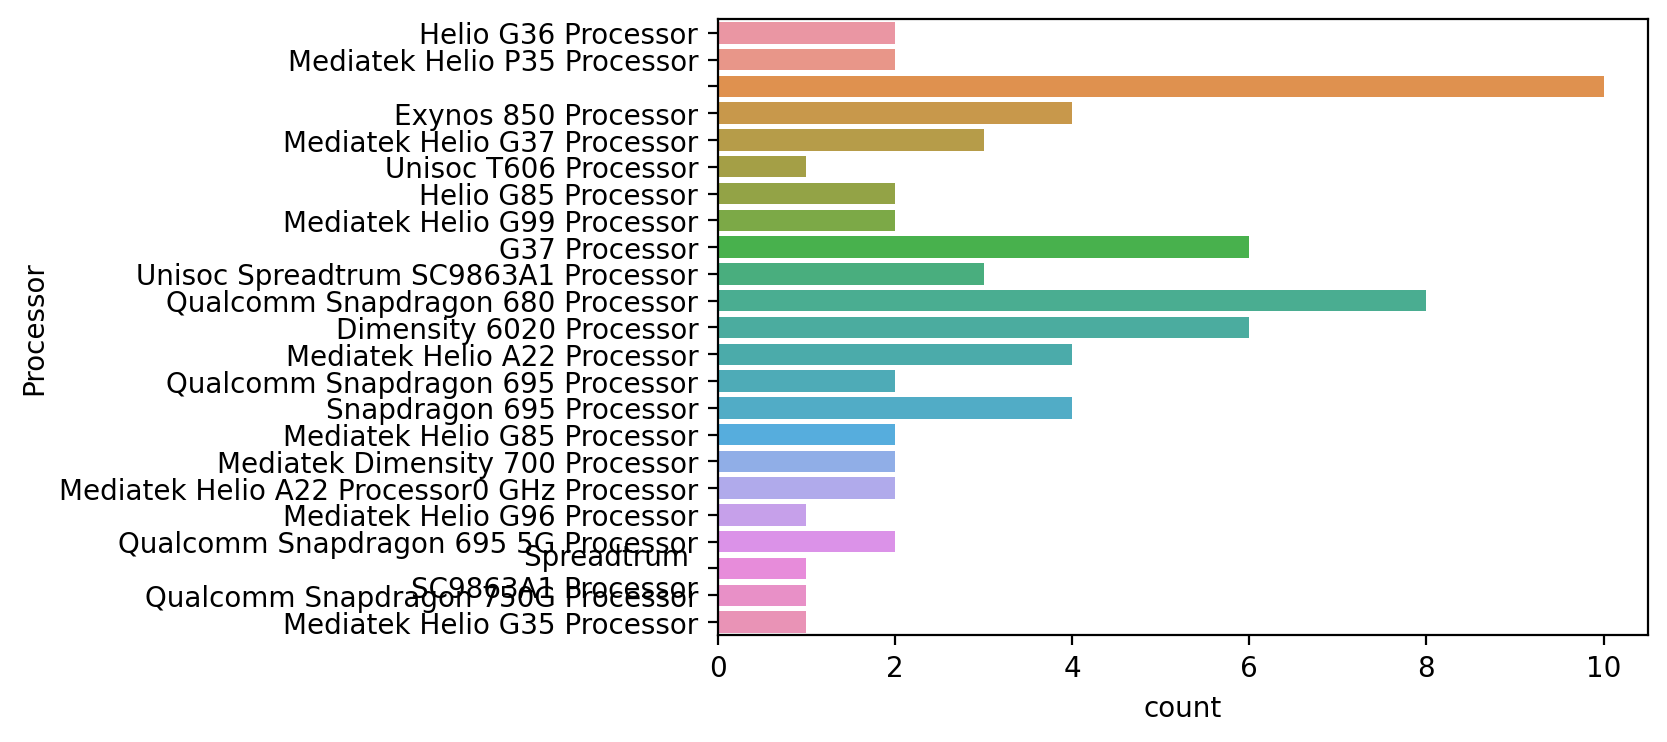

In [87]:
plt.figure(figsize = (6,4),dpi = 200)
sns.countplot(y = data.Processor)

<Figure size 1280x960 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Price'>

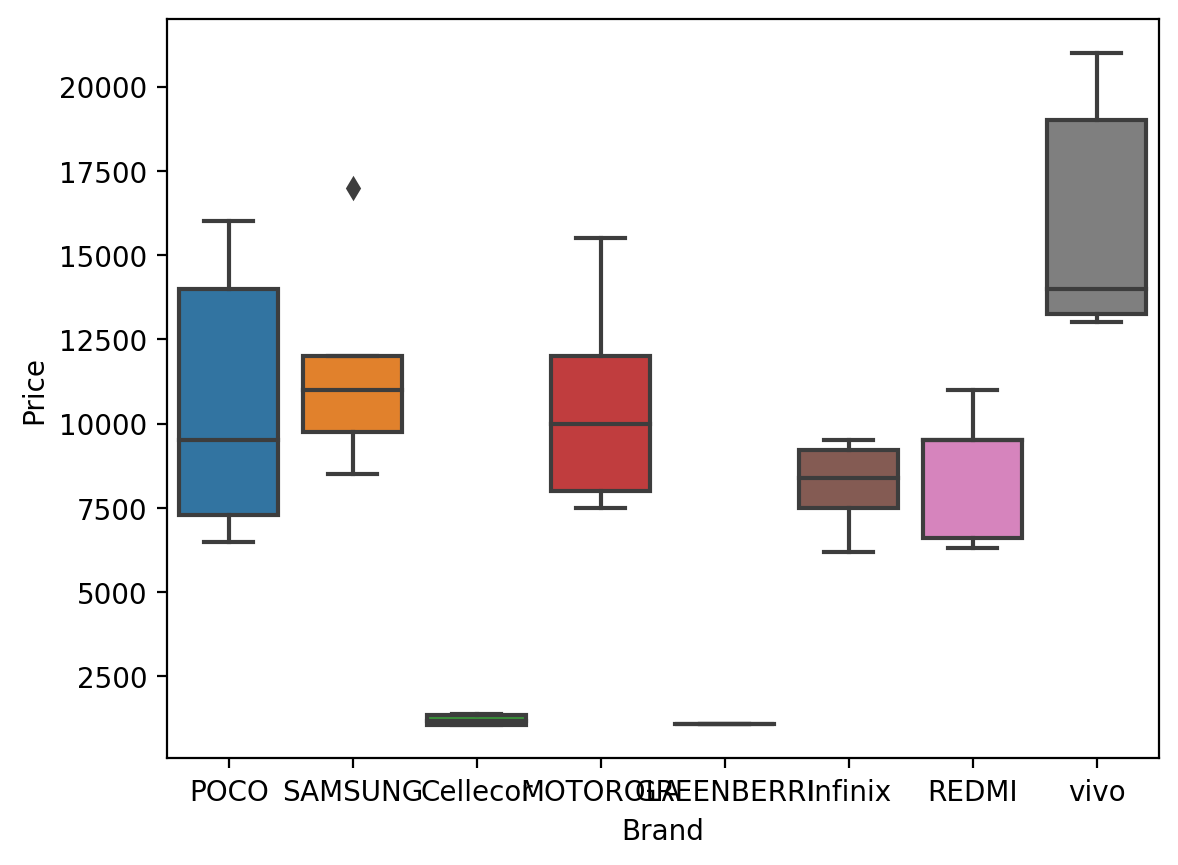

In [88]:
plt.figure(dpi = 200)
sns.boxplot(x=data.Brand,y = data.Price)

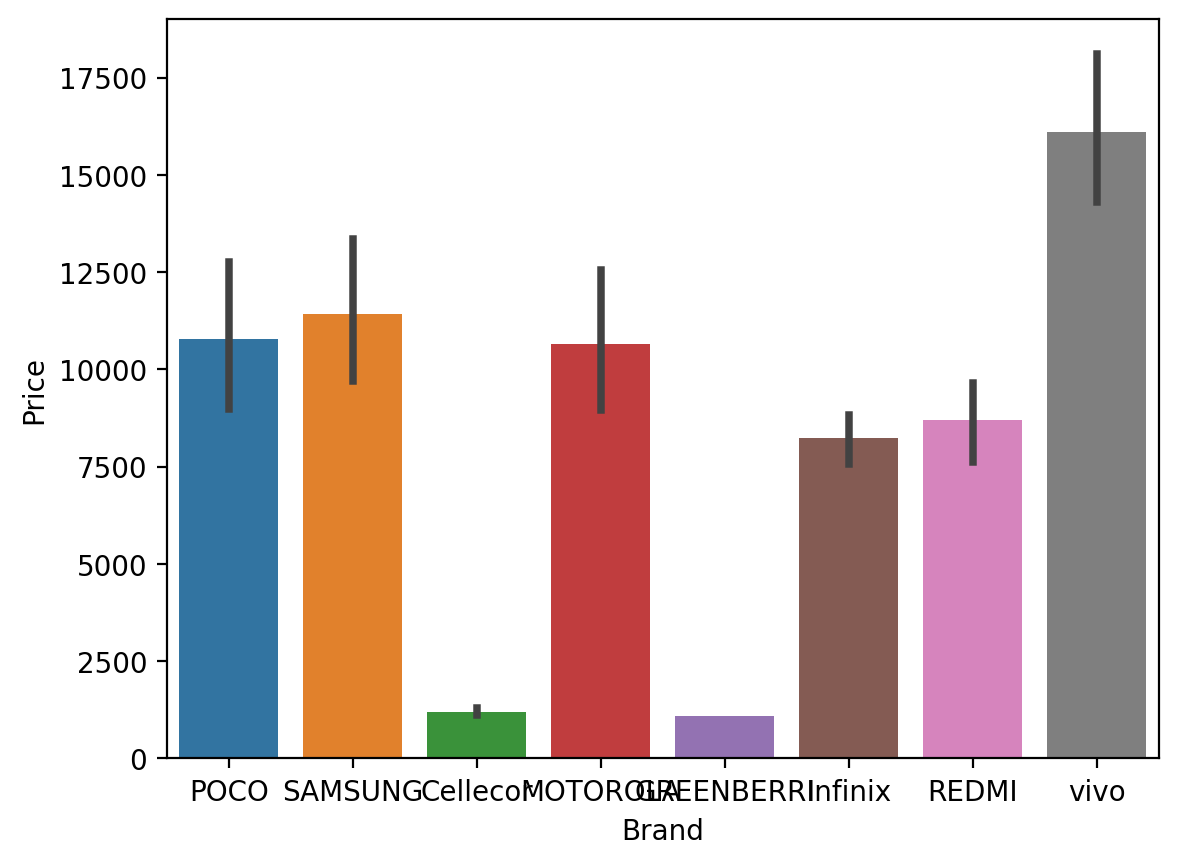

In [90]:
plt.figure(dpi = 200)
sns.barplot(x=data.Brand,y = data.Price);

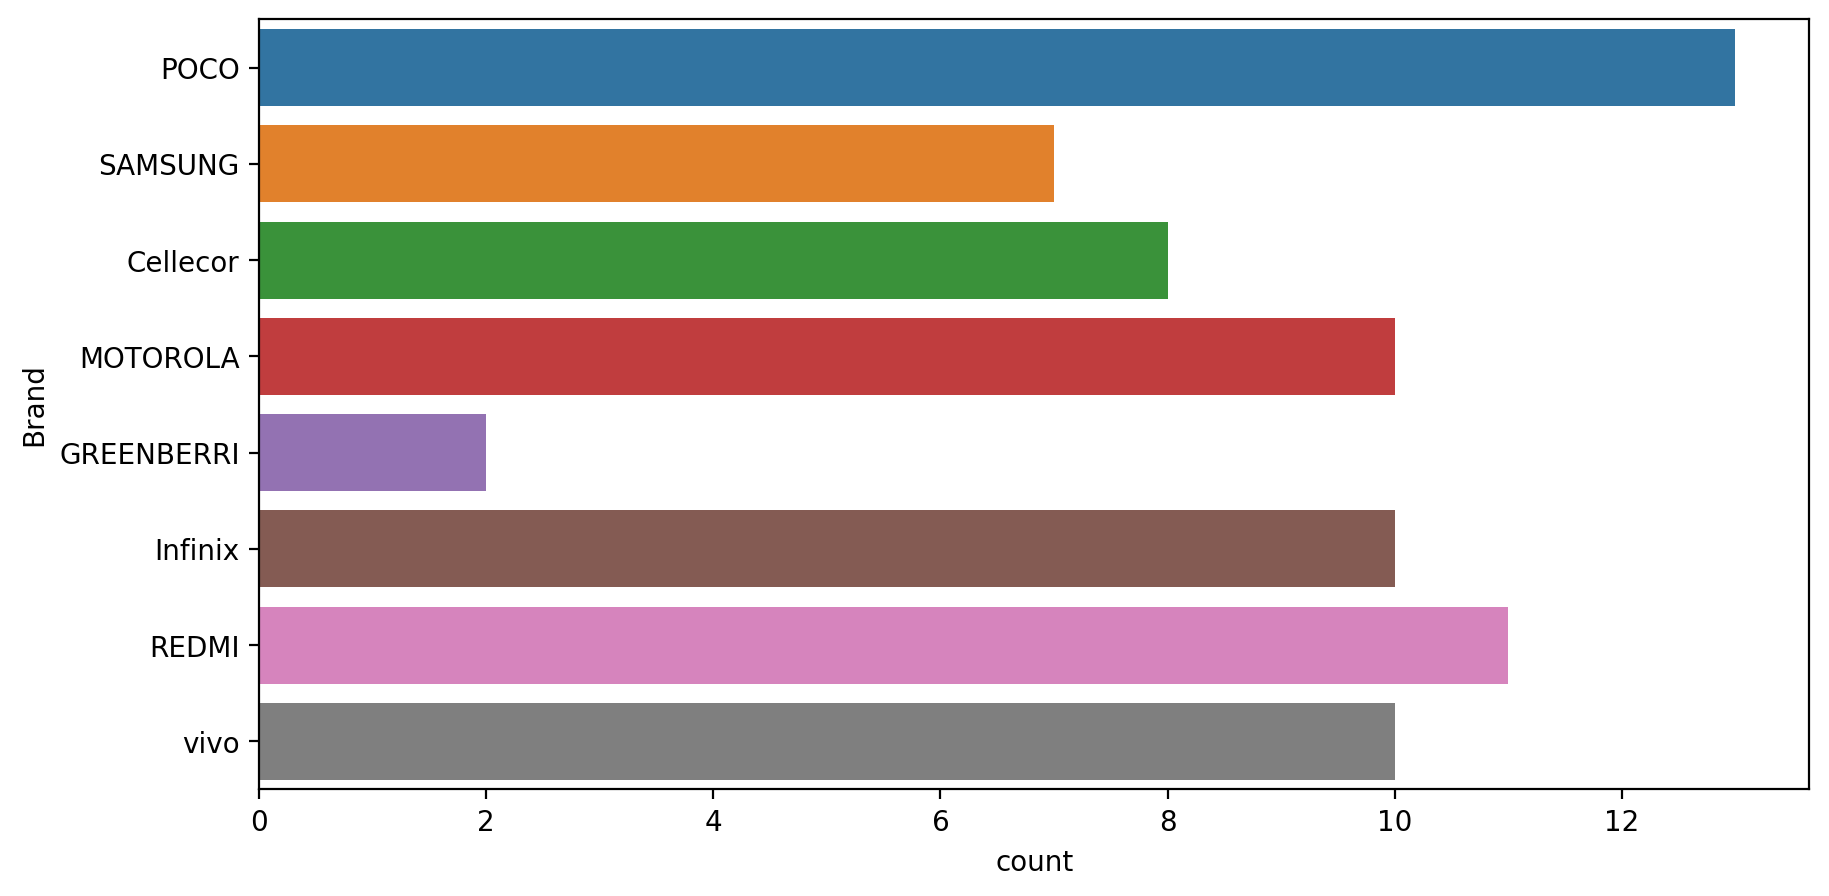

In [91]:
plt.figure(figsize = (10,5),dpi = 200)
sns.countplot(y = data.Brand);

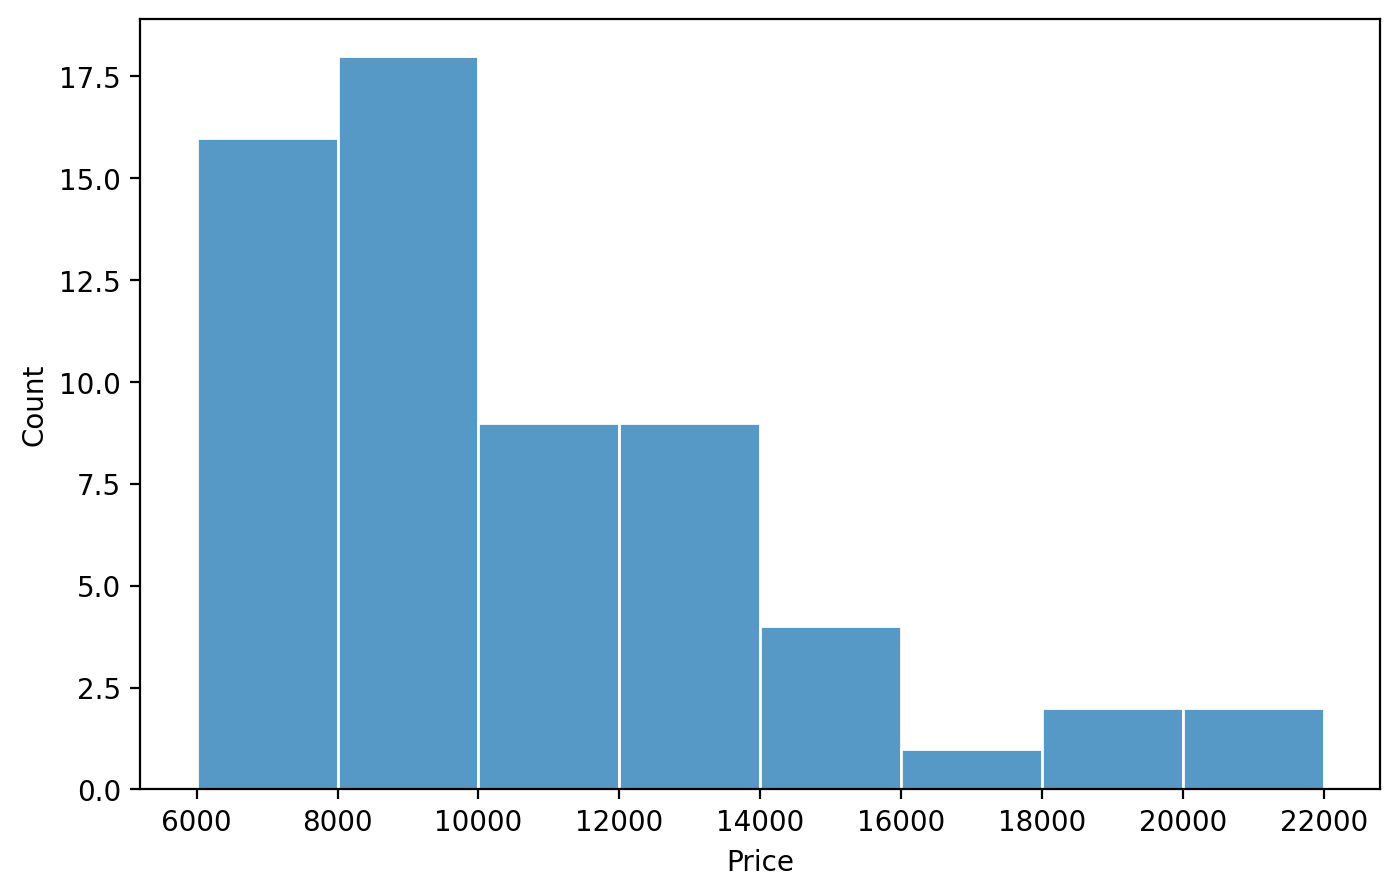

In [92]:
plt.figure(figsize = (8,5),dpi = 200)
sns.histplot(data.Price,edgecolor = 'white',bins = range(6000,24000,2000));

<Figure size 1280x960 with 0 Axes>

<AxesSubplot:xlabel='Screensize_inch', ylabel='Price'>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, '18.0'),
  Text(1, 0, '24.0'),
  Text(2, 0, '65.0'),
  Text(3, 0, '66.0'),
  Text(4, 0, '67.0'),
  Text(5, 0, '144.0'),
  Text(6, 0, '638.0'),
  Text(7, 0, '643.0'),
  Text(8, 0, '652.0'),
  Text(9, 0, '653.0'),
  Text(10, 0, '655.0'),
  Text(11, 0, '658.0'),
  Text(12, 0, '667.0'),
  Text(13, 0, '671.0')])

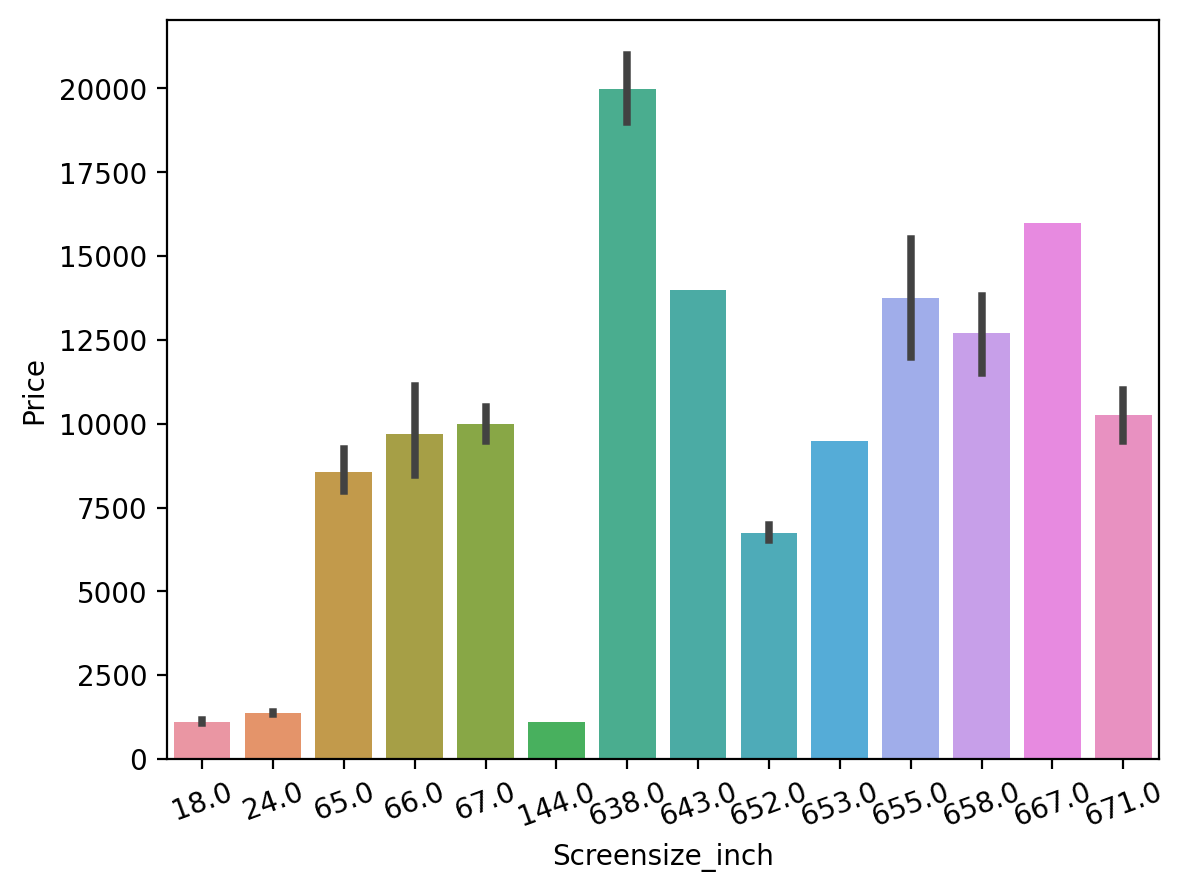

In [94]:
plt.figure(dpi = 200)
sns.barplot(x=data.Screensize_inch, y= data.Price);
plt.xticks(rotation = 20)

<Figure size 1280x960 with 0 Axes>

<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '2.0'),
  Text(1, 0, '3.0'),
  Text(2, 0, '4.0'),
  Text(3, 0, '6.0'),
  Text(4, 0, '8.0'),
  Text(5, 0, '32.0')])

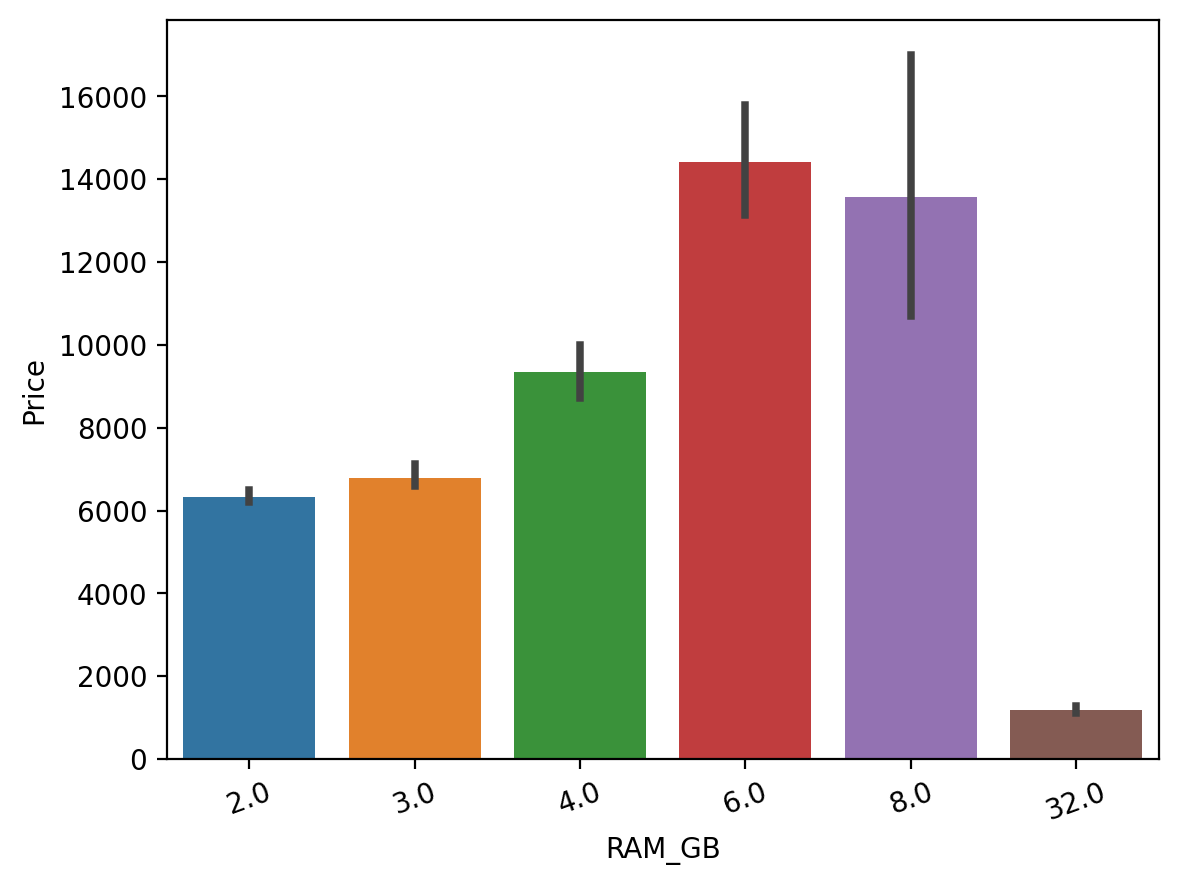

In [95]:
plt.figure(dpi = 200)
sns.barplot(x=data.RAM_GB, y= data.Price);
plt.xticks(rotation = 20)

<Figure size 1280x960 with 0 Axes>

<AxesSubplot:xlabel='Storage_GB', ylabel='Price'>

(array([0, 1, 2]),
 [Text(0, 0, '32.0'), Text(1, 0, '64.0'), Text(2, 0, '128.0')])

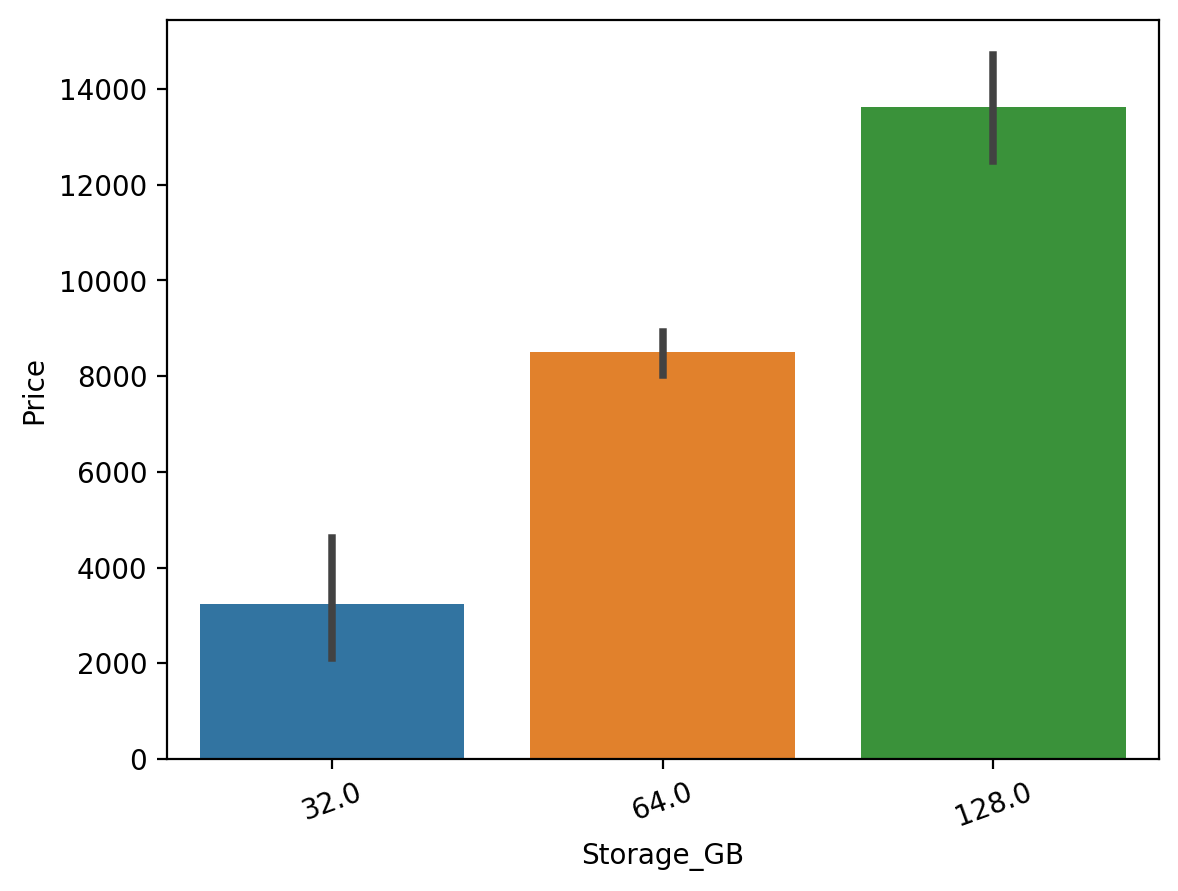

In [96]:
plt.figure(dpi = 200)
sns.barplot(x=data.Storage_GB, y= data.Price)
plt.xticks(rotation = 20)

<Figure size 1280x960 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Rating'>

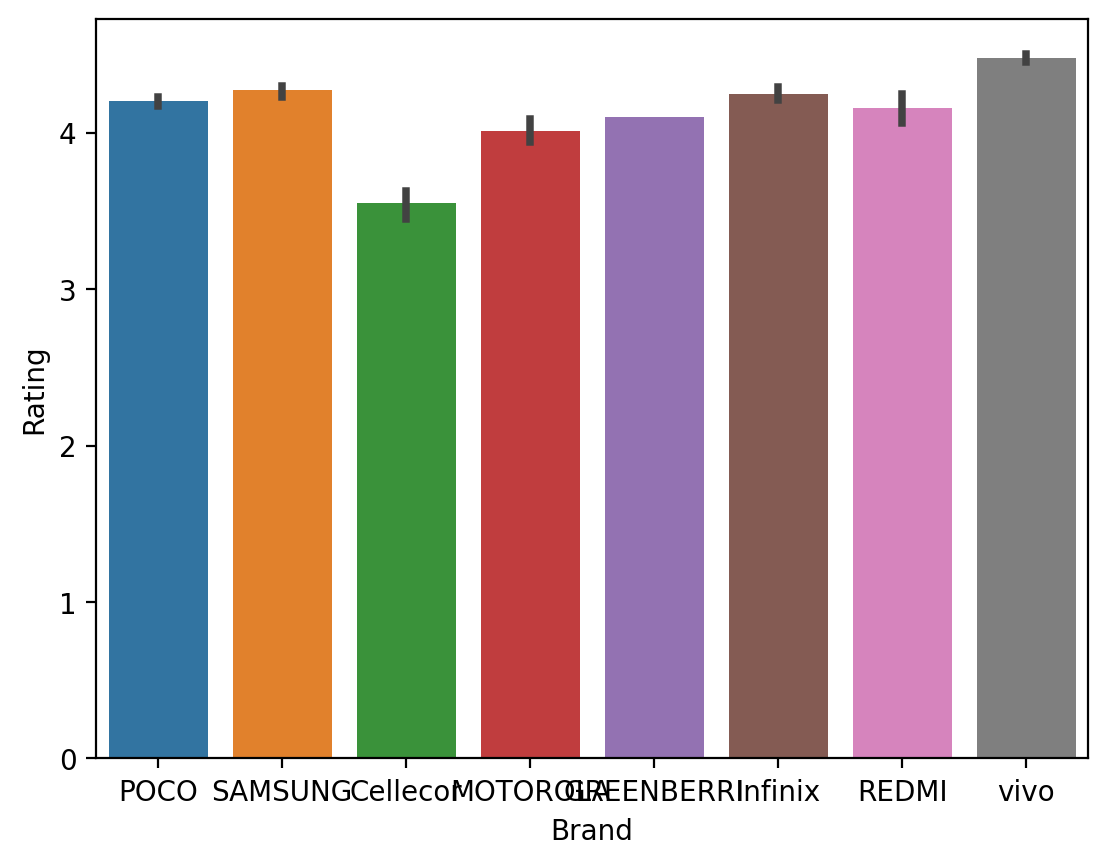

In [97]:
plt.figure(dpi = 200)
sns.barplot(x=data.Brand, y= data.Rating)

<Figure size 1280x960 with 0 Axes>

<AxesSubplot:xlabel='Brand', ylabel='Rating'>

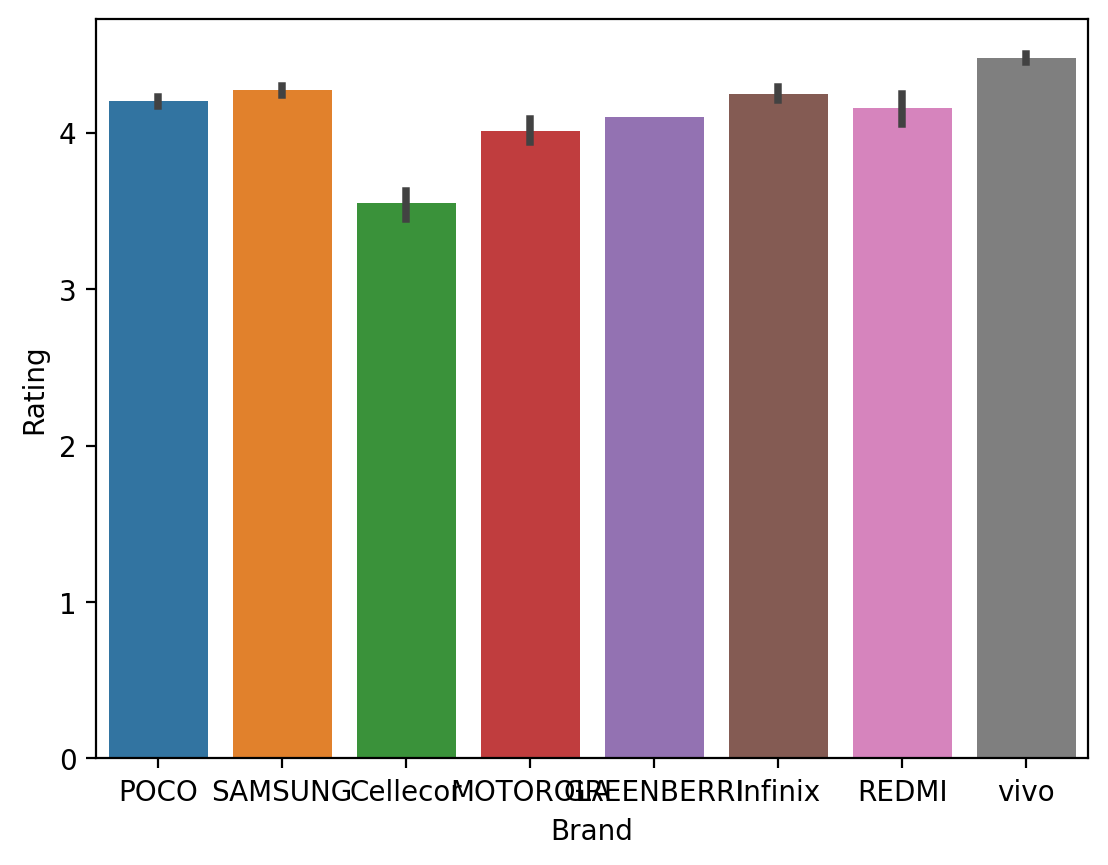

In [98]:
plt.figure(dpi = 200)
sns.barplot(x=data.Brand, y= data.Rating)

In [99]:
data.describe()

,Rating,Screensize_inch,Price,Storage_GB,RAM_GB
count,71.000000,71.000000,71.000000,71.000000,71.000000
mean,4.143662,328.197183,9543.140845,84.732394,8.704225
std,0.269779,298.283404,4849.183791,40.150061,9.619020
min,3.300000,18.000000,1061.000000,32.000000,2.000000
25%,4.100000,66.000000,7149.000000,64.000000,4.000000
50%,4.200000,67.000000,9499.000000,64.000000,4.000000
75%,4.300000,654.000000,12499.000000,128.000000,7.000000
max,4.500000,671.000000,20999.000000,128.000000,32.000000


<Figure size 3000x1000 with 0 Axes>

<AxesSubplot:xlabel='Price', ylabel='Count'>

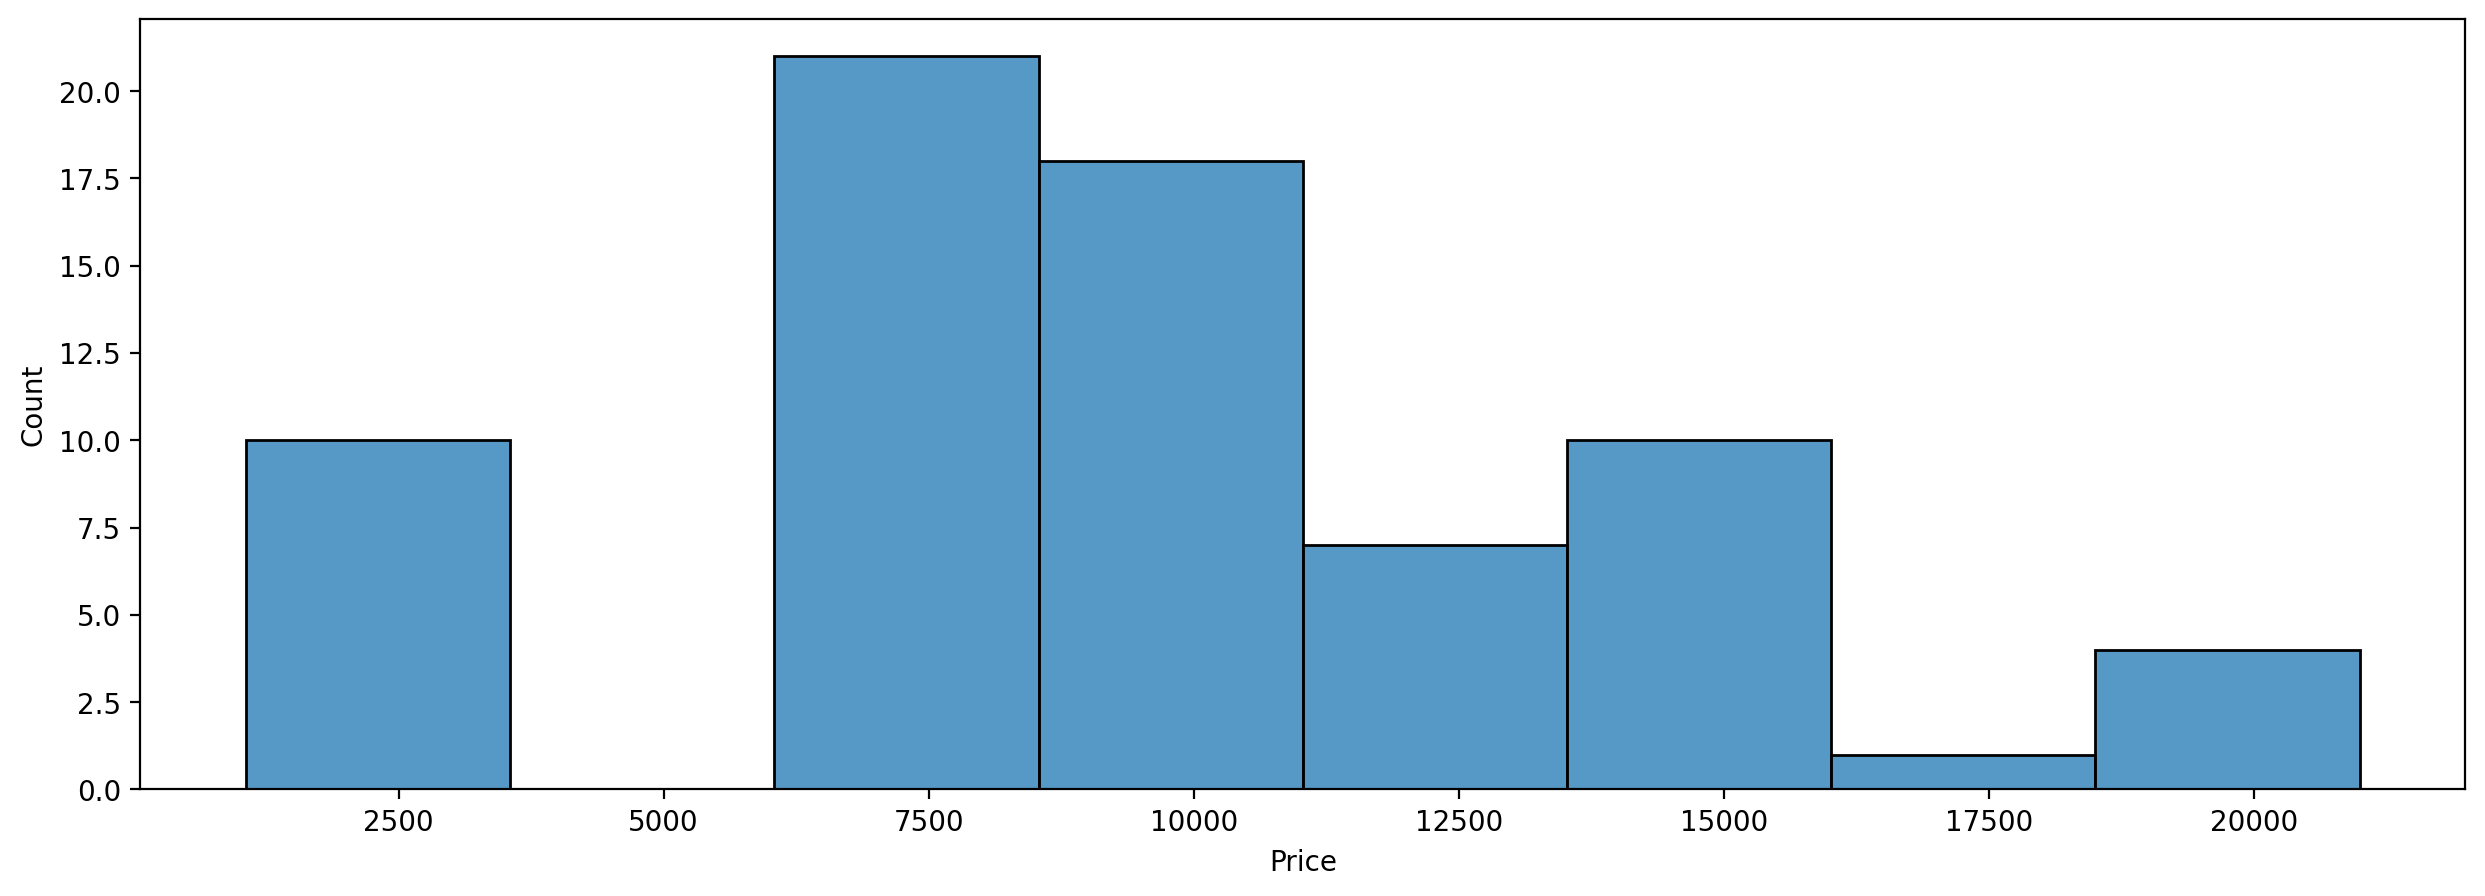

In [100]:
plt.figure(figsize = (15,5),dpi = 200)
sns.histplot(data = data,x = 'Price')

<Figure size 3000x1000 with 0 Axes>

<AxesSubplot:xlabel='RAM_GB', ylabel='Count'>

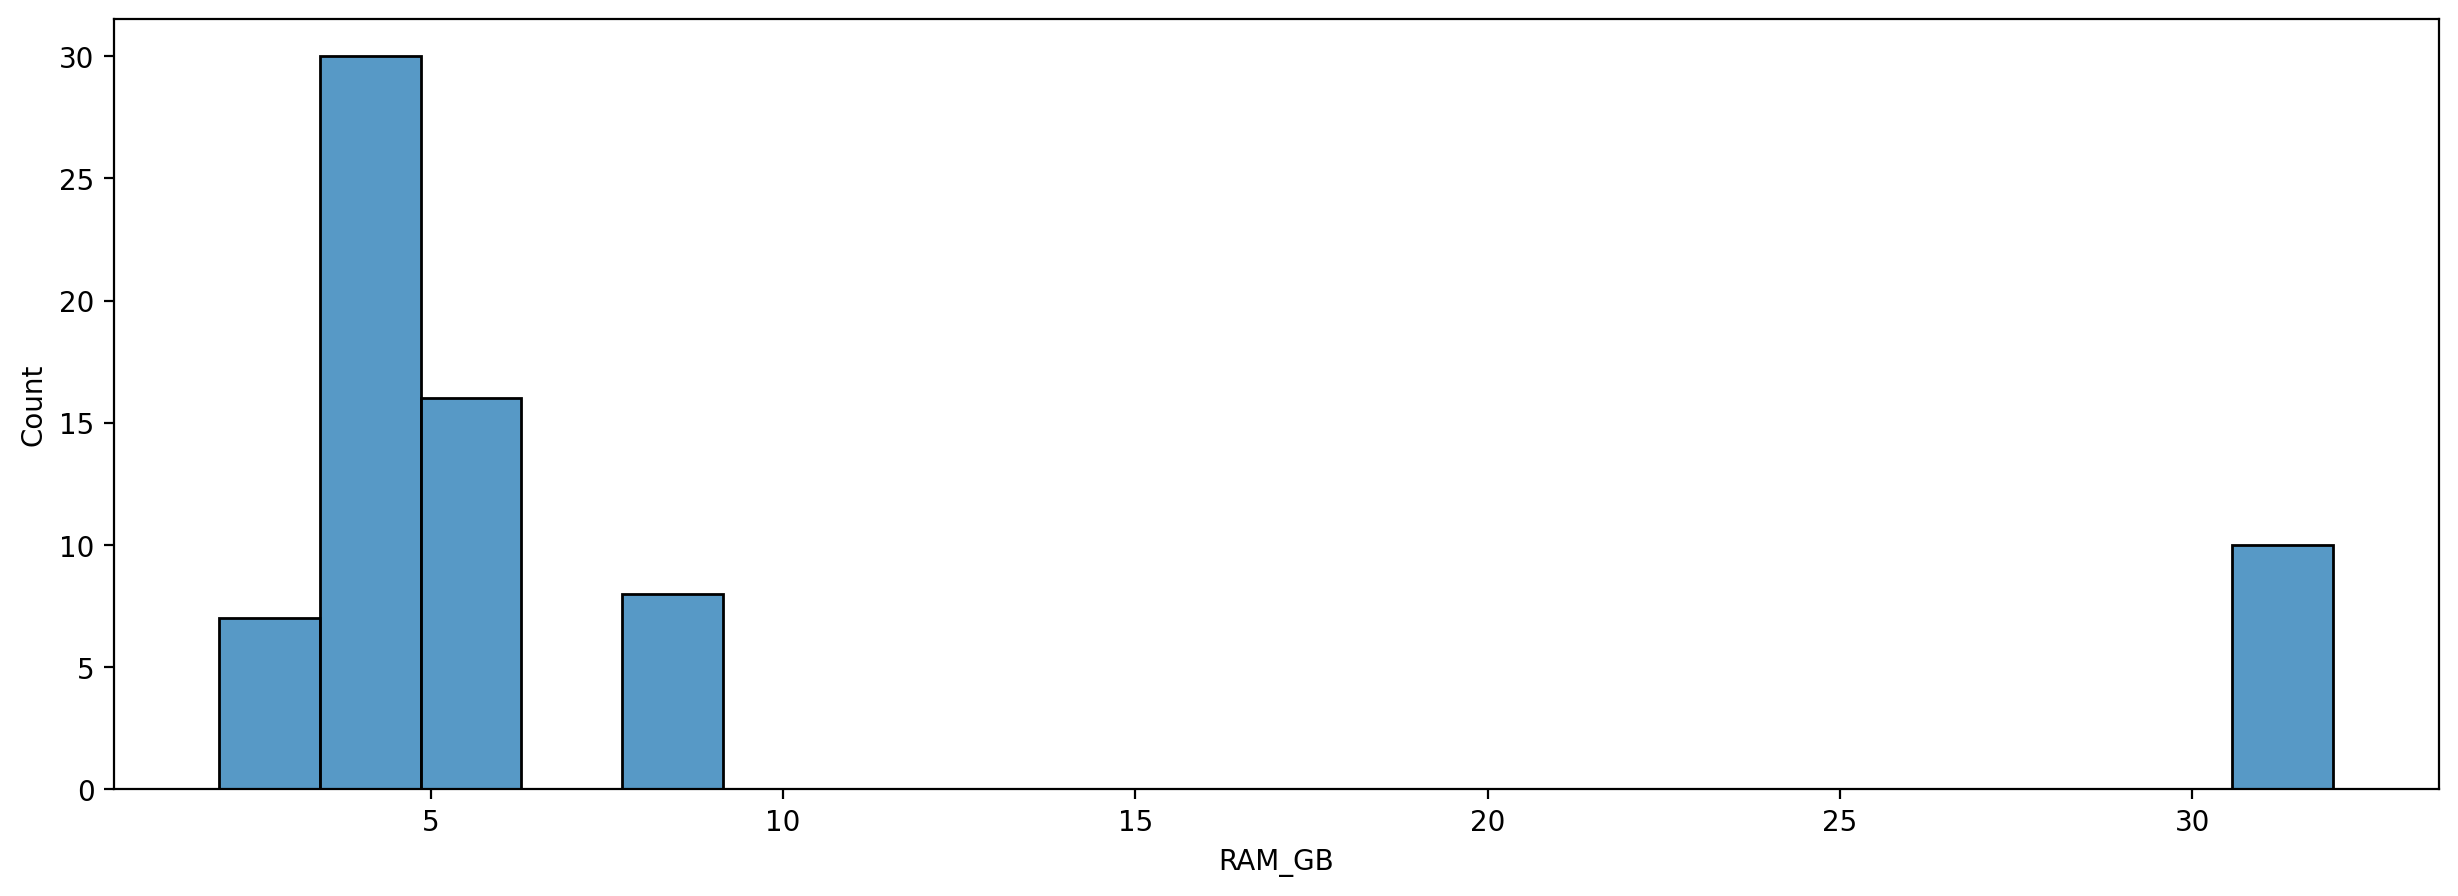

In [101]:
plt.figure(figsize = (15,5),dpi = 200)
sns.histplot(data = data,x = 'RAM_GB')

<Figure size 3000x1000 with 0 Axes>

<AxesSubplot:xlabel='Price'>

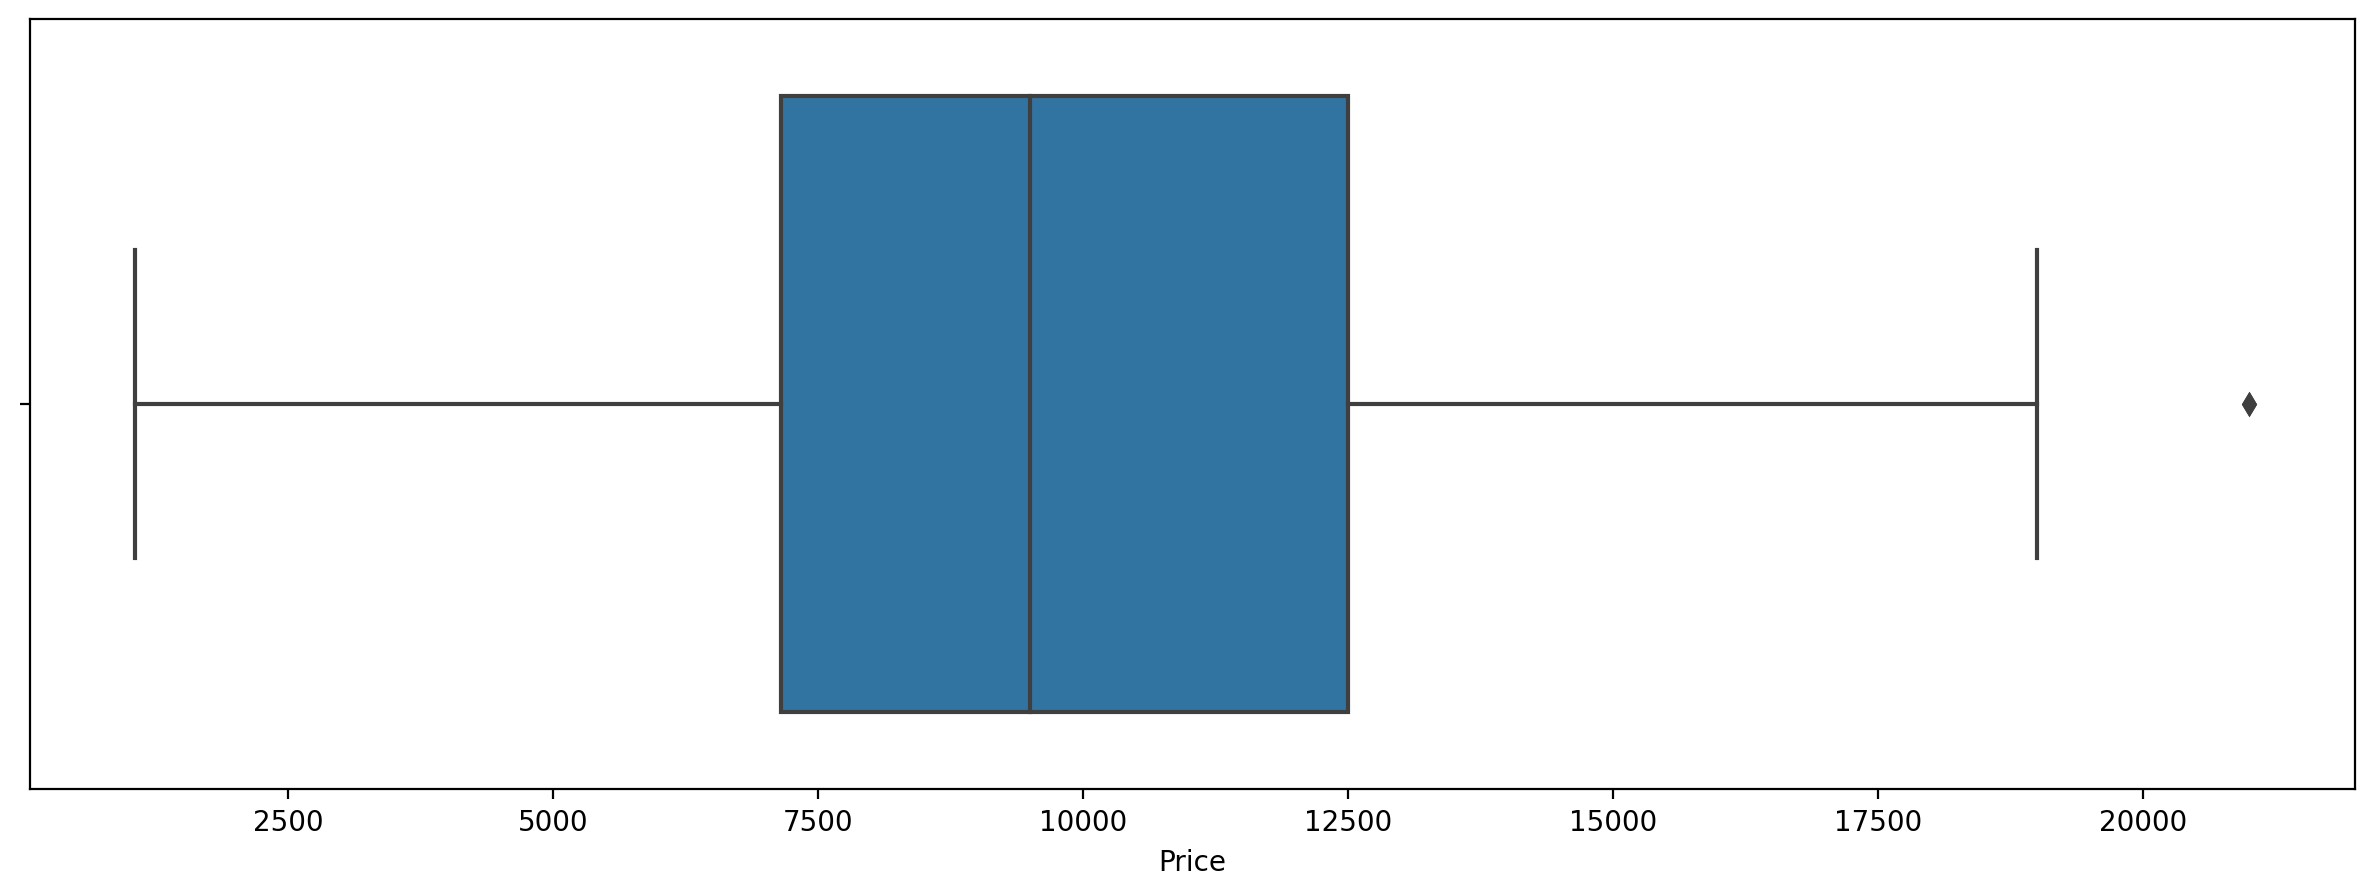

In [102]:
plt.figure(figsize = (15,5),dpi = 200)
sns.boxplot(data = data,x = 'Price')

<Figure size 4500x1200 with 0 Axes>

<AxesSubplot:xlabel='Price', ylabel='Density'>

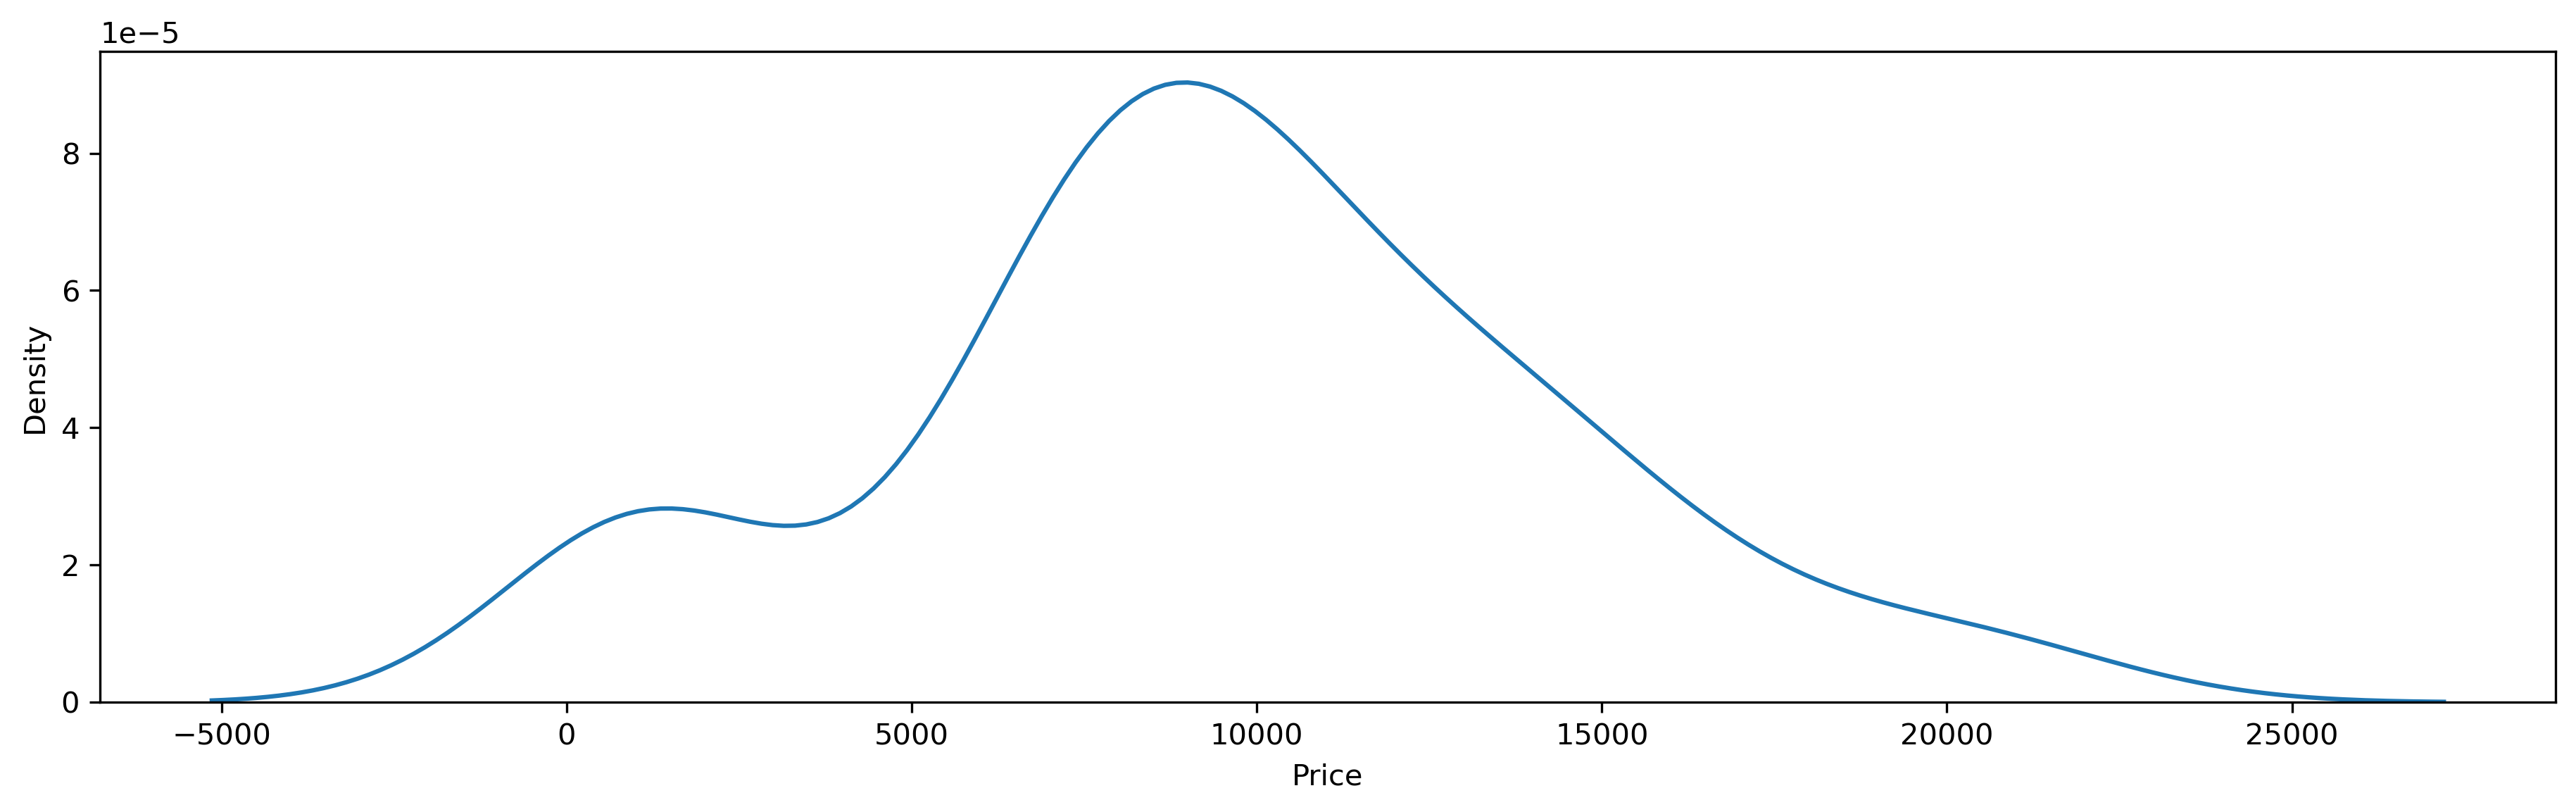

In [103]:
plt.figure(figsize = (15,4),dpi = 300)
sns.kdeplot(data = data,x = 'Price')

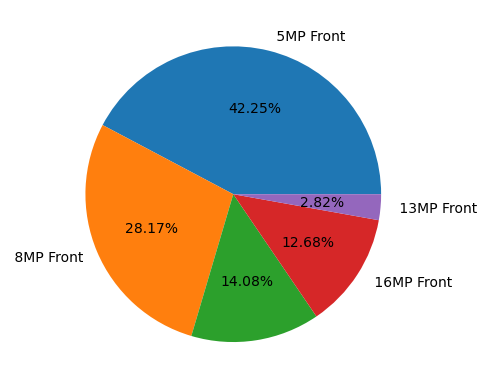

In [107]:
plt.figure(dpi = 100)
plt.pie(data.Front_camera.value_counts(),labels = data.Front_camera.value_counts().index,autopct = '%.2f%%');

<Figure size 1280x960 with 0 Axes>

<AxesSubplot:xlabel='Screensize_inch', ylabel='Price'>

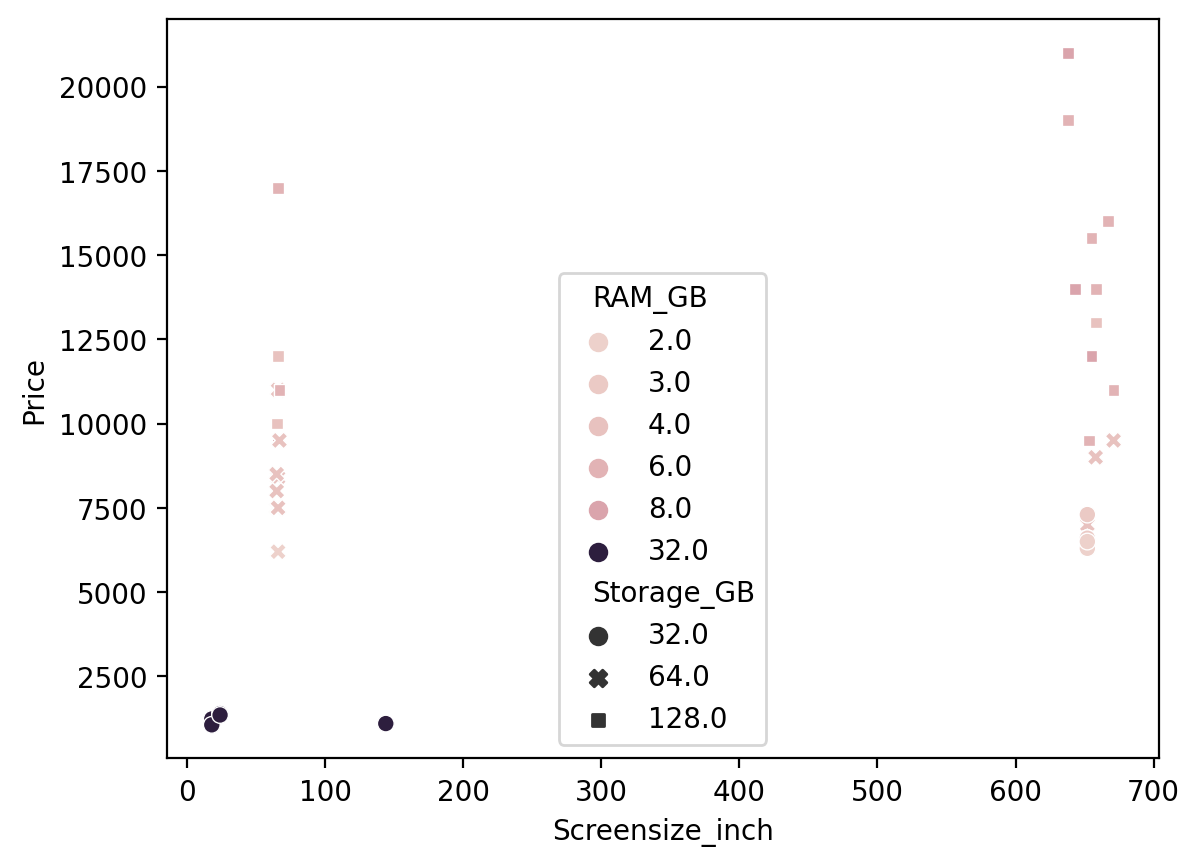

In [108]:
plt.figure(dpi = 200)
sns.scatterplot(x=data.Screensize_inch, y = data.Price, hue = data.RAM_GB, style = data.Storage_GB)
plt.savefig('plot.png',dpi = 1000)
